# Analysis of the results for the Crypto dataset
# `crypto`
## Setup

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
timestamp = 1
day_length = 24 * timestamp
train_time = 300
coins = ["BTC", "ETH", "XRP", "BNB", "SOL", "TRX", "DOGE", "BCH", "ADA"]
total_num_coins = len(coins)

## Results

In [3]:
result = torch.tensor(np.load("STGAN/crypto/result/2026-02-18_03-40-23/result.npy"), dtype=torch.float)

In [4]:
result.shape

torch.Size([1383, 9, 3])

In [5]:
coin_num = 0
days = 30

<Axes: >

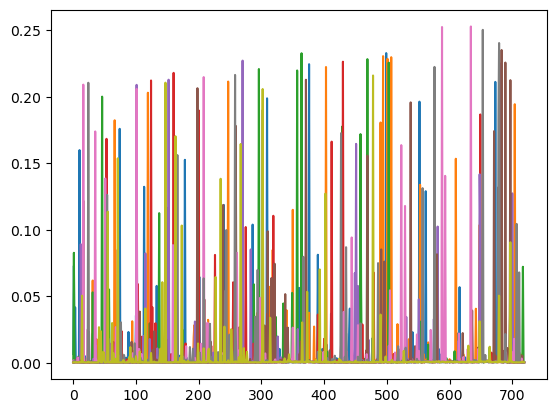

In [6]:
pd.DataFrame(result[:days*day_length, :, 0].numpy()).plot(legend=False)

<Axes: >

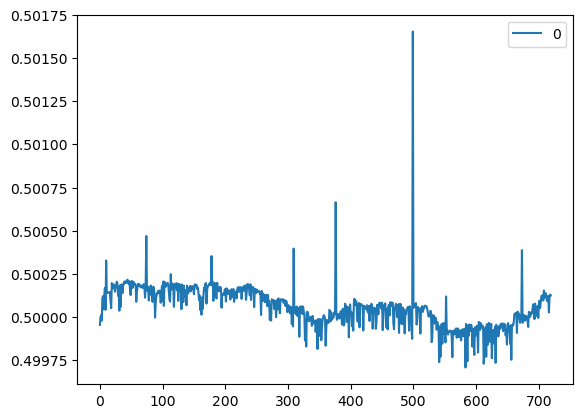

In [7]:
pd.DataFrame(result[:days*day_length, coin_num, 1].numpy()).plot()

<Axes: >

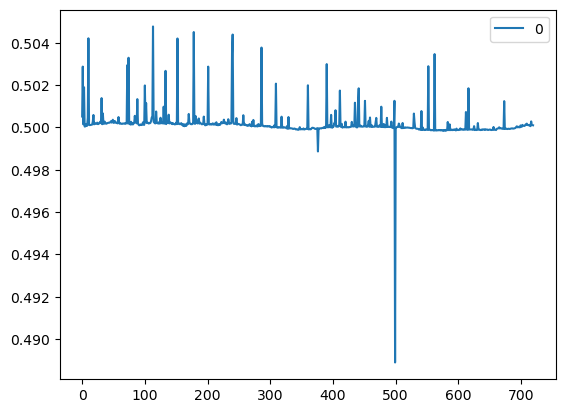

In [8]:
pd.DataFrame(result[:days*day_length, coin_num, 2].numpy()).plot()

## Anomaly scores from all the coins
Combining the two scores, from the generator and the discriminator.

In [9]:
lambda_coef = 1
for coin_num in range(result.shape[1]):
    column_name = "Score Coin " + str(coin_num)
    if coin_num == 0:
        anomaly_score = pd.DataFrame([], columns=[column_name])
    s_G = pd.DataFrame(result[:, coin_num, 0].numpy())
    s_D = pd.DataFrame(result[:, coin_num, 1].numpy()) - pd.DataFrame(result[:, coin_num, 2].numpy())
    anomaly_score[column_name] = s_G + lambda_coef * s_D

<Axes: >

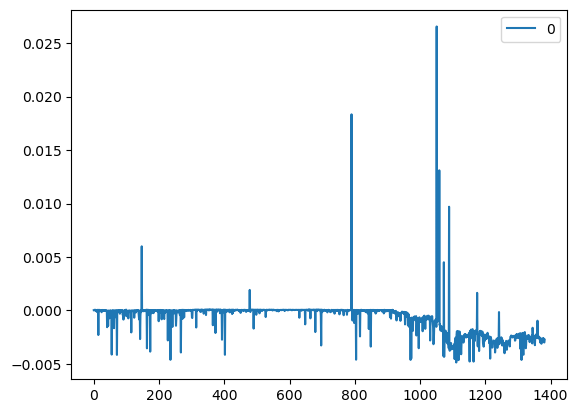

In [10]:
s_D.plot()

<Axes: >

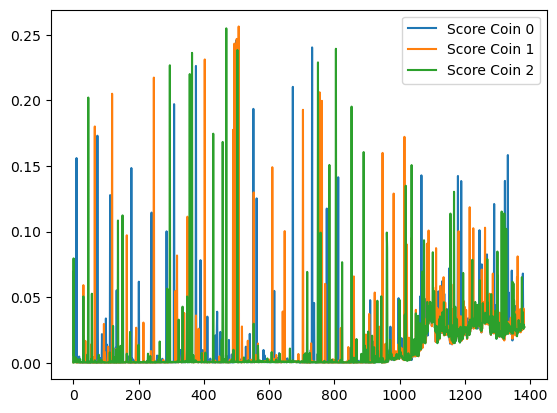

In [11]:
anomaly_score[anomaly_score.columns[:3]].plot()

In [12]:
anomaly_score

,Score Coin 0,Score Coin 1,Score Coin 2,Score Coin 3,Score Coin 4,Score Coin 5,Score Coin 6,Score Coin 7,Score Coin 8
0,0.006027,0.000555,0.000288,0.000331,0.000619,0.000674,0.001409,0.000623,0.000373
1,0.070073,0.000614,0.079582,0.000608,0.000609,0.000325,0.000516,0.000303,0.000424
2,0.000663,0.000317,0.000279,0.000758,0.000463,0.000729,0.000492,0.001576,0.000594
3,0.039762,0.000587,0.000567,0.000604,0.000680,0.000310,0.000651,0.000638,0.000418
4,0.000696,0.000632,0.000544,0.000772,0.000656,0.001663,0.000725,0.000765,0.000324
...,...,...,...,...,...,...,...,...,...
1378,0.068009,0.027922,0.038521,0.026930,0.026560,0.027176,0.029519,0.030567,0.030015
1379,0.029174,0.025749,0.026044,0.028392,0.025742,0.026538,0.026074,0.027548,0.026074
1380,0.027331,0.041357,0.025760,0.025570,0.026292,0.040793,0.029047,0.028336,0.032533
1381,0.027400,0.026893,0.029088,0.027652,0.027930,0.028773,0.032900,0.108565,0.032648


<Axes: >

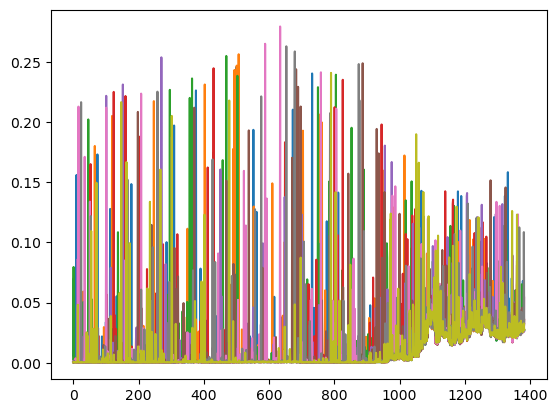

In [13]:
anomaly_score.plot(legend=False)

<Axes: title={'center': 'MSE loss'}>

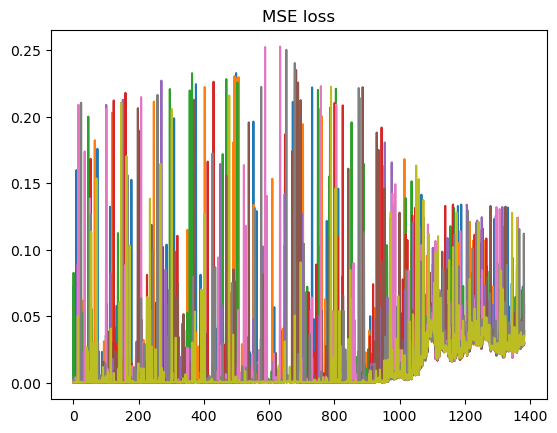

In [14]:
pd.DataFrame(result[:, :, 0].numpy()).plot(legend=False, title="MSE loss")

<Axes: title={'center': 'Real score'}>

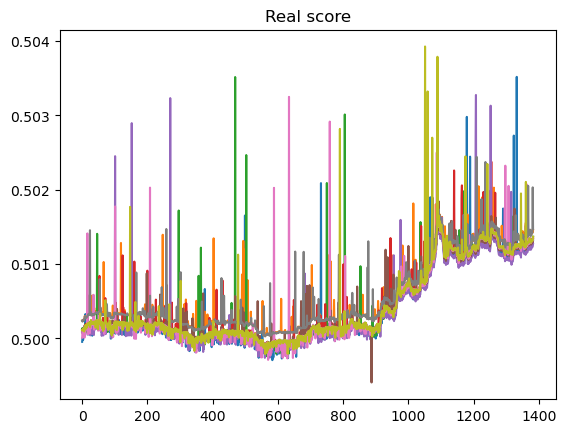

In [15]:
pd.DataFrame(result[:, :, 1].numpy()).plot(legend=False, title="Real score")

<Axes: title={'center': 'Fake score'}>

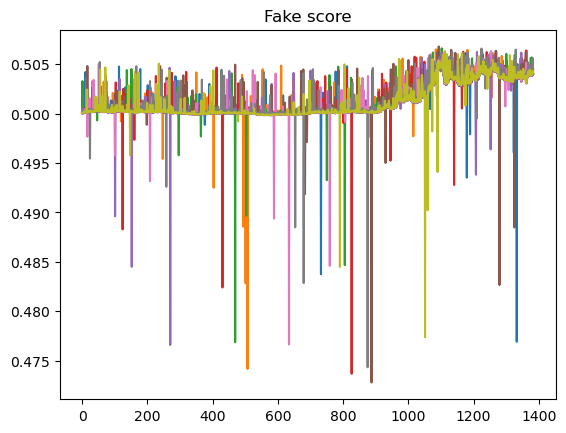

In [16]:
pd.DataFrame(result[:, :, 2].numpy()).plot(legend=False, title="Fake score")

## Selecting the top K% anomaly scores

In [17]:
K = 0.001

In [18]:
# Step 1: Flatten the DataFrame to get all values in a single array
flat_anomaly_score = anomaly_score.values.flatten()

# Step 2: Get the original coordinates
coordinates = [(i, j) for i in range(anomaly_score.shape[0]) for j in range(anomaly_score.shape[1])]

# Step 3: Sort the array while keeping track of the original coordinates
sorted_indices = np.argsort(flat_anomaly_score)[::-1]
sorted_coordinates = [coordinates[i] for i in sorted_indices]

# Print sorted coordinates
# for coord in sorted_coordinates:
#     print(coord)
#     print(anomaly_score.iloc[coord])

In [19]:
sorted_coordinates[:20]

[(634, 6),
 (588, 6),
 (653, 7),
 (679, 7),
 (507, 1),
 (469, 2),
 (270, 4),
 (887, 5),
 (875, 7),
 (501, 1),
 (499, 0),
 (430, 3),
 (683, 5),
 (494, 1),
 (759, 6),
 (790, 8),
 (732, 0),
 (805, 2),
 (503, 2),
 (364, 2)]

In [20]:
pd.Series([x[0] for x in sorted_coordinates[:20]]).nunique()

20

In [21]:
len(sorted_coordinates)

12447

<Axes: >

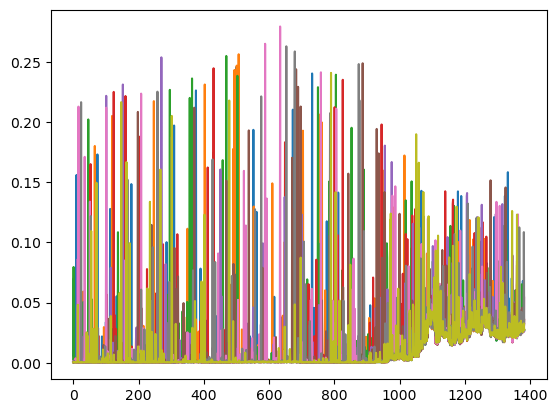

In [22]:
anomaly_score.plot(legend=False)

<Axes: >

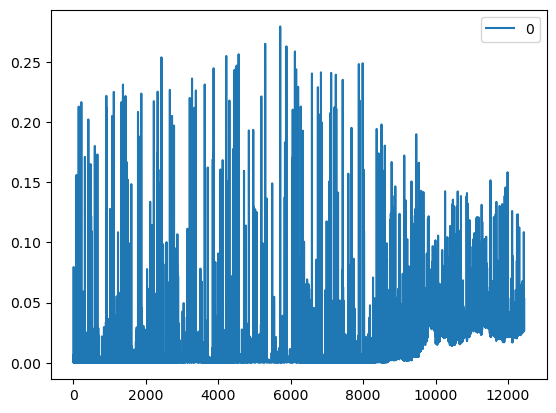

In [23]:
pd.DataFrame(flat_anomaly_score).plot()

In [24]:
head = int(np.floor(K * len(flat_anomaly_score)))

In [25]:
anomalies = sorted_coordinates[:head]
anomalies

[(634, 6),
 (588, 6),
 (653, 7),
 (679, 7),
 (507, 1),
 (469, 2),
 (270, 4),
 (887, 5),
 (875, 7),
 (501, 1),
 (499, 0),
 (430, 3)]

In [26]:
minutes = pd.Series([minutes for minutes, coin_nums in anomalies])
coin_nums = pd.Series([coin_nums for minutes, coin_nums in anomalies])

In [27]:
minutes

0     634
1     588
2     653
3     679
4     507
5     469
6     270
7     887
8     875
9     501
10    499
11    430
dtype: int64

In [28]:
coin_nums

0     6
1     6
2     7
3     7
4     1
5     2
6     4
7     5
8     7
9     1
10    0
11    3
dtype: int64

In [29]:
assert(len(coins) == total_num_coins)
coins

['BTC', 'ETH', 'XRP', 'BNB', 'SOL', 'TRX', 'DOGE', 'BCH', 'ADA']

In [30]:
day_tmp, tmp = divmod(minutes*int(60/timestamp), 60*24)
days = day_tmp + 1
clock_hour, clock_min = divmod(tmp, 60)

for i, day in enumerate(days):
    print(f"Anomaly at: Coin {coins[coin_nums[i]]}, day #{day} of test, at {clock_hour[i]}:{clock_min[i]}.")

Anomaly at: Coin DOGE, day #27 of test, at 10:0.
Anomaly at: Coin DOGE, day #25 of test, at 12:0.
Anomaly at: Coin BCH, day #28 of test, at 5:0.
Anomaly at: Coin BCH, day #29 of test, at 7:0.
Anomaly at: Coin ETH, day #22 of test, at 3:0.
Anomaly at: Coin XRP, day #20 of test, at 13:0.
Anomaly at: Coin SOL, day #12 of test, at 6:0.
Anomaly at: Coin TRX, day #37 of test, at 23:0.
Anomaly at: Coin BCH, day #37 of test, at 11:0.
Anomaly at: Coin ETH, day #21 of test, at 21:0.
Anomaly at: Coin BTC, day #21 of test, at 19:0.
Anomaly at: Coin BNB, day #18 of test, at 22:0.


## Plotting the anomalies for a specific coin

In [31]:
# Choose the coin
coin_num = 0

In [32]:
minutes[coin_nums == coin_num]

10    499
dtype: int64

In [33]:
# Read again, all the training data
data = torch.tensor(np.load("STGAN/crypto/data/data.npy"), dtype=torch.float)
df = pd.DataFrame(data[train_time*day_length:, coin_num, 0, 0])
df.columns = ["Adj Close"]

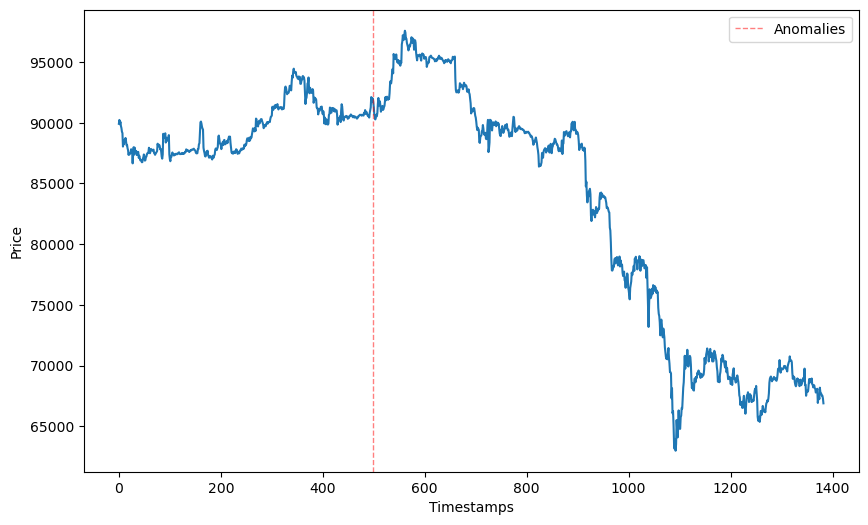

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(df["Adj Close"])

for i, time in enumerate(minutes[coin_nums == coin_num]):
    if i == 0:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5, label="Anomalies")
    else:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5)


plt.xlabel("Timestamps")
plt.ylabel("Price")
plt.legend()
plt.show()